In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("./data/pima-indians-diabeties.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
len(df.columns), df.columns

(9,
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'))

In [47]:
X = df.drop('Outcome', axis=1)
y = df[['Outcome']]

## `Visualization`

In [48]:
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

In [49]:
def configs(df: pd.DataFrame, num_cols: int):
    if not isinstance(num_cols, int):
        raise TypeError(f"num_rows must be integer.")
    
    if not isinstance(df, pd.DataFrame):
        raise TypeError(f"num_rows must be integer.")
    
    features = list(df.columns)
    num_features = len(features)

    is_even = num_features % num_cols == 0
    num_rows = num_features//num_cols if is_even else math.ceil(num_features/num_cols)

    return features, num_rows

def plot_data_density(df, features, num_rows, num_cols):
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    for idx, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, idx+1)
        plt.hist(df[feature])
        plt.xlabel(feature)
    
    plt.show()

def kde_plot(df, features, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    for idx, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, idx+1)
        density = gaussian_kde(df[feature])
        x_vals = np.linspace(0, max(df[feature]), 100)
        plt.plot(x_vals, density(x_vals))
        
        plt.xlabel(feature)
    plt.tight_layout()
    
    plt.show()

def box_plot(df, features, num_rows, num_cols):
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    for idx, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, idx+1)
        plt.boxplot(df[feature])
        plt.xlabel(feature)
    plt.show()

In [50]:
num_cols=2
features, num_rows = configs(X, num_cols=num_cols)

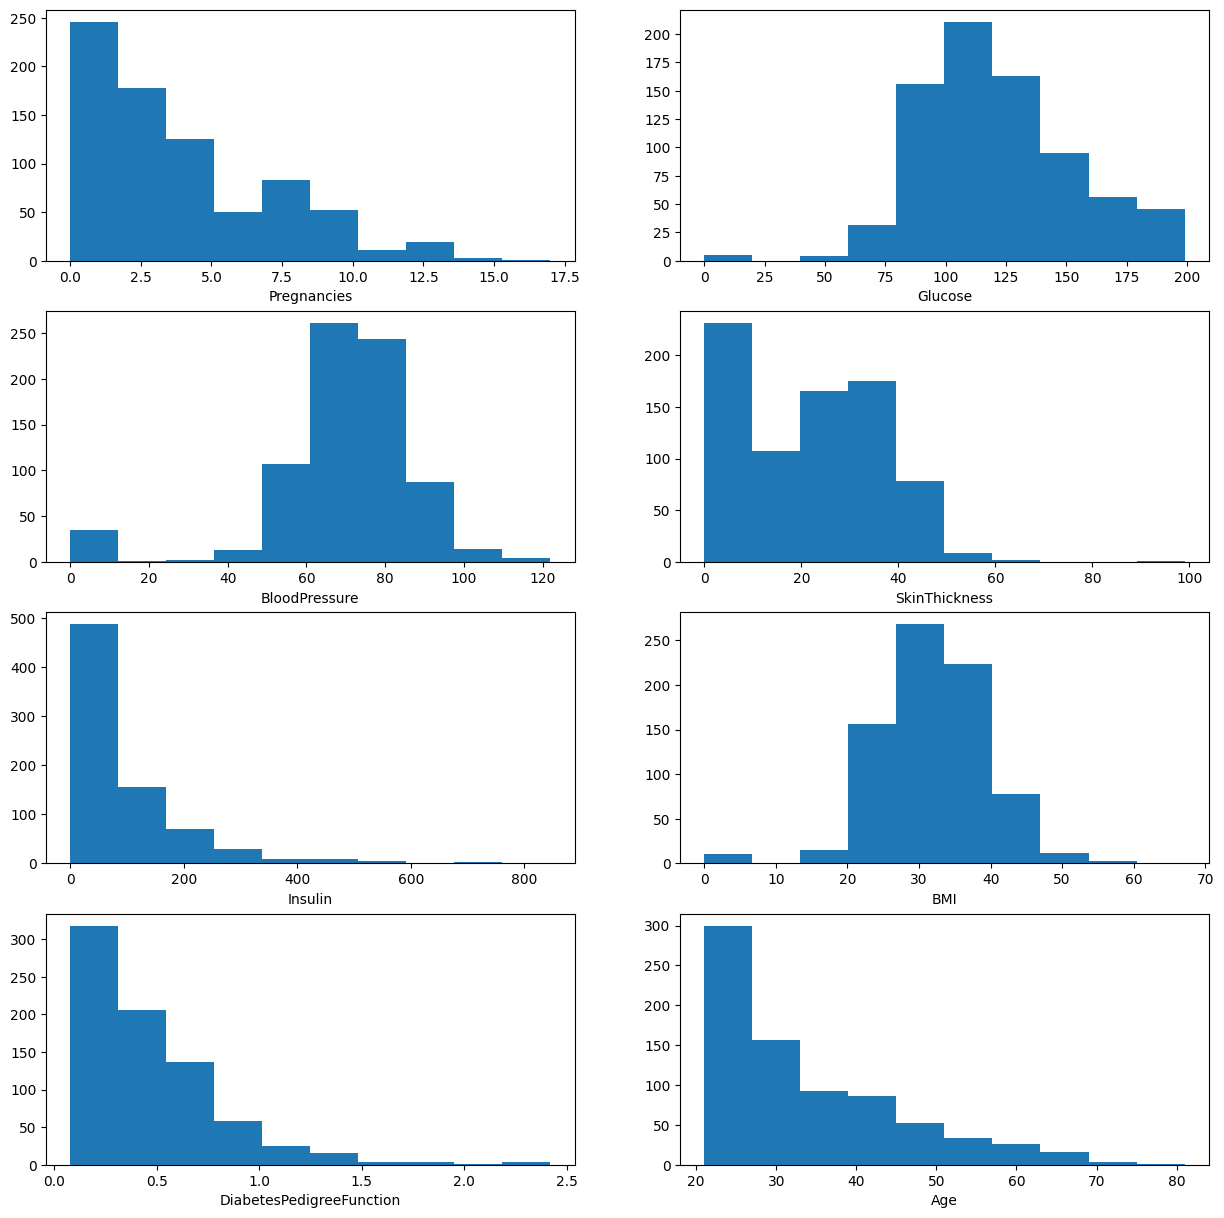

In [51]:
plot_data_density(X, features, num_rows, num_cols)

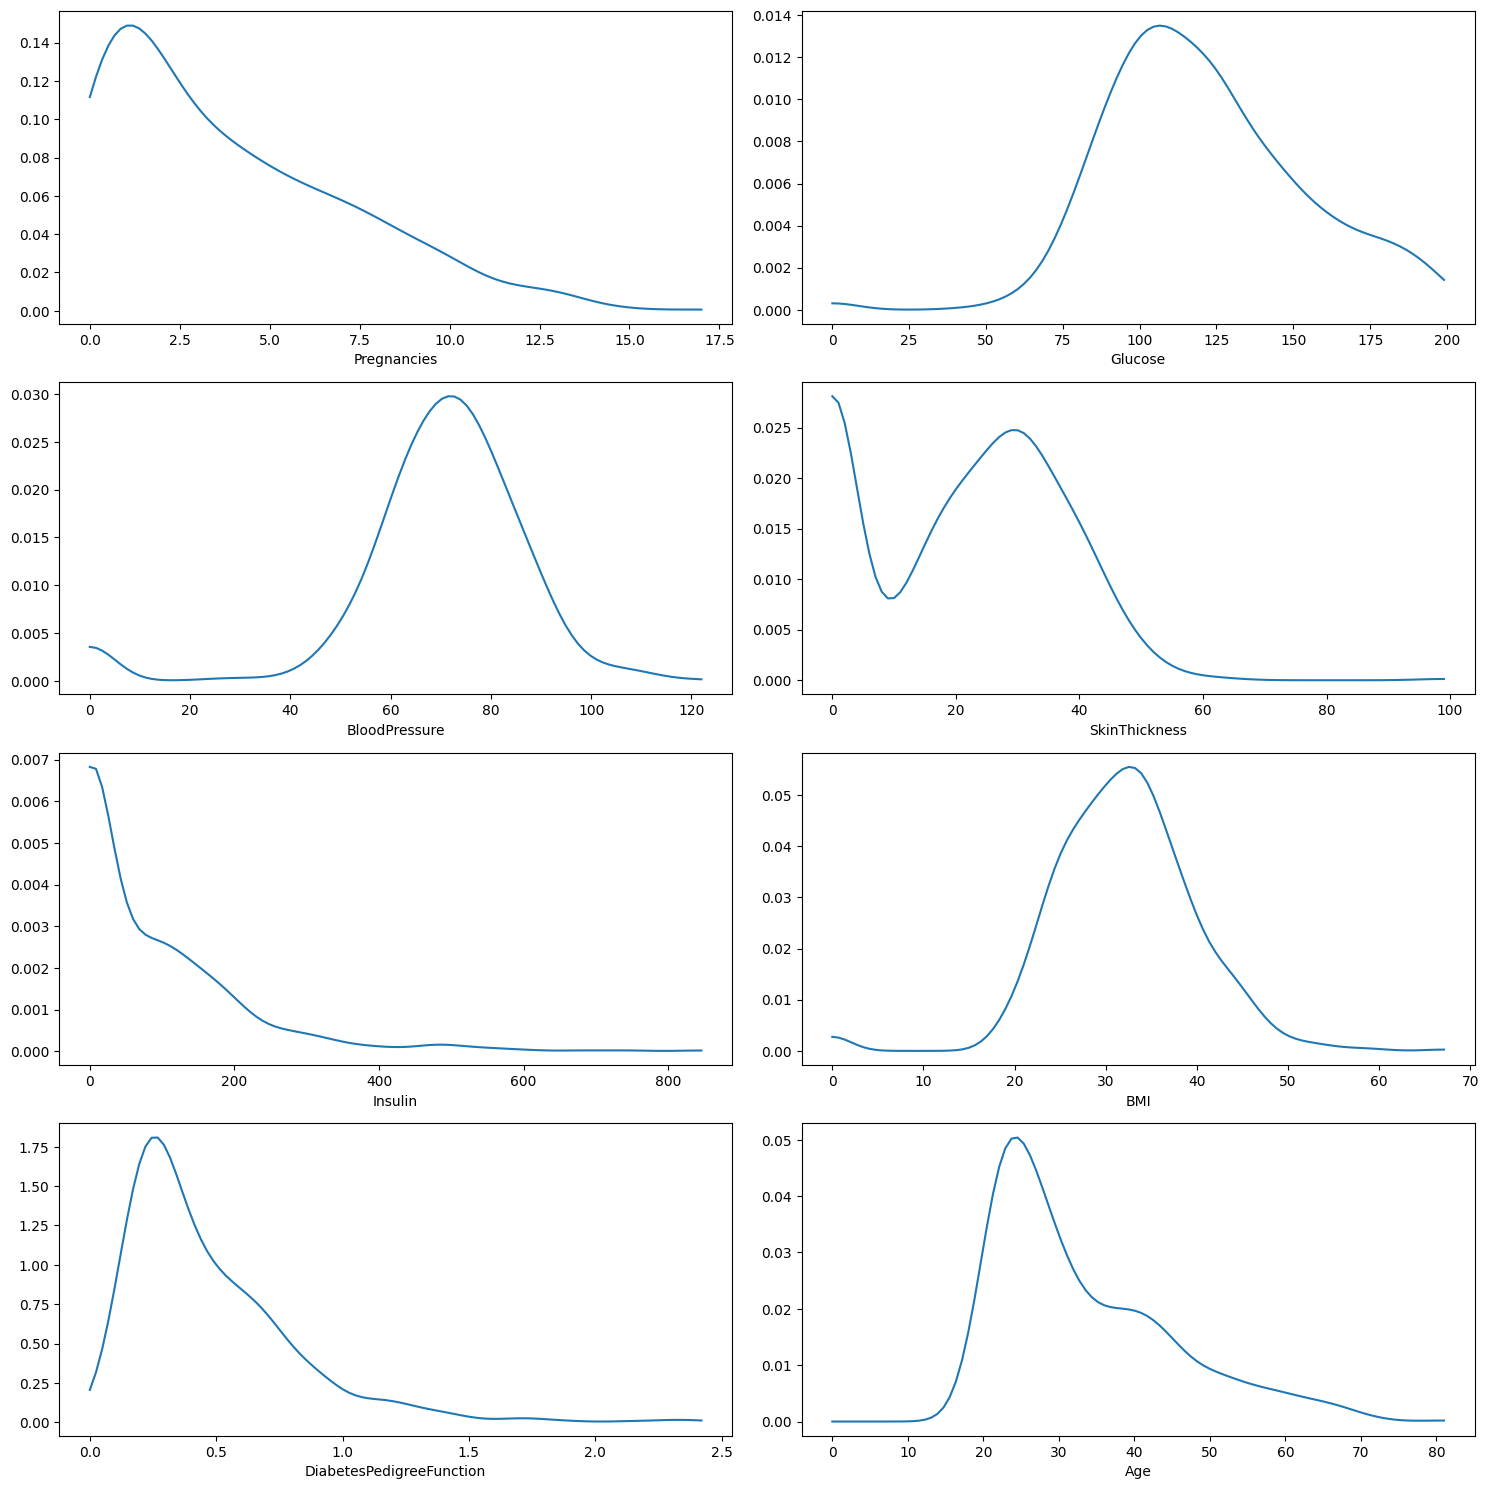

In [52]:
kde_plot(X, features, num_rows, num_cols)

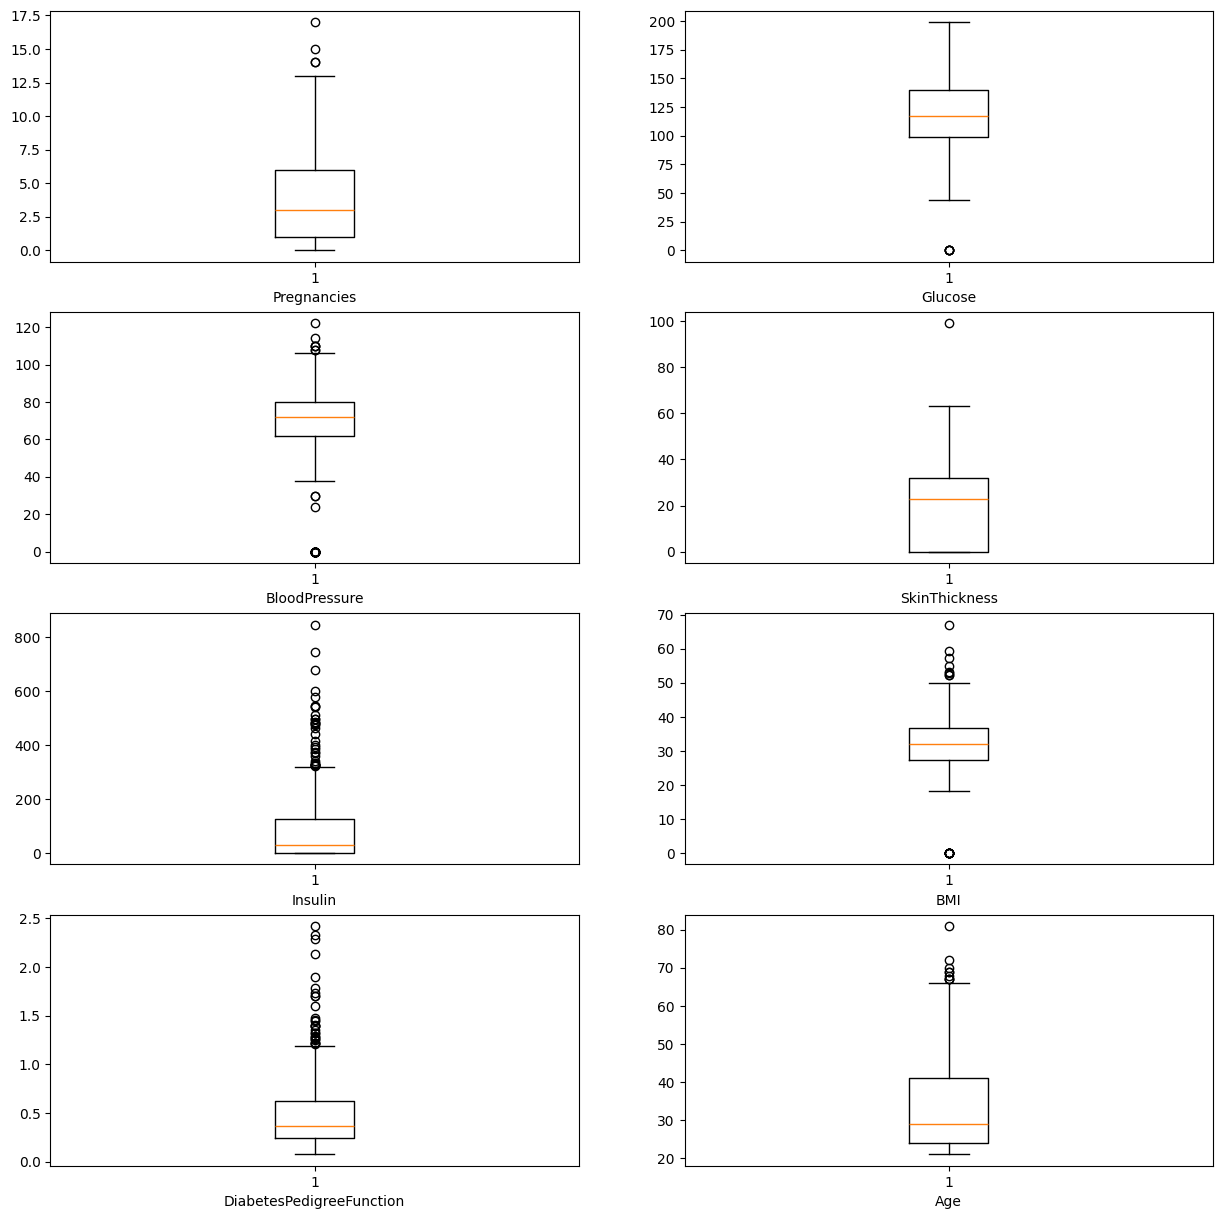

In [53]:
box_plot(X, features, num_rows, num_cols)